In [1]:
# Basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn libraries for model building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score



In [2]:
# Load dataset
df = pd.read_csv("50_Startups.csv")
df.head()


,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [3]:
# Check info and missing values
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   Profit           50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


R&D Spend          0
Administration     0
Marketing Spend    0
Profit             0
dtype: int64

In [4]:
df = pd.get_dummies(df, drop_first=True)
df.head()


,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [5]:
X = df.drop("Profit", axis=1)  # Features
y = df["Profit"]               # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

# Fit and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print(f"{name} R² Score: {score:.4f}")


Linear Regression R² Score: 0.9001
Decision Tree R² Score: 0.5060
Random Forest R² Score: 0.9103


In [7]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"\n{name}")
    print(f"R² Score: {r2_score(y_test, y_pred):.4f}")
    print(f"RMSE: {mean_squared_error(y_test, y_pred, squared=False):.4f}")



Linear Regression
R² Score: 0.9001
RMSE: 8995.9058

Decision Tree
R² Score: 0.5060
RMSE: 20000.6620

Random Forest
R² Score: 0.9103
RMSE: 8522.0308


In [8]:
import joblib

best_model = models["Random Forest"]
joblib.dump(best_model, "best_model.pkl")


['best_model.pkl']

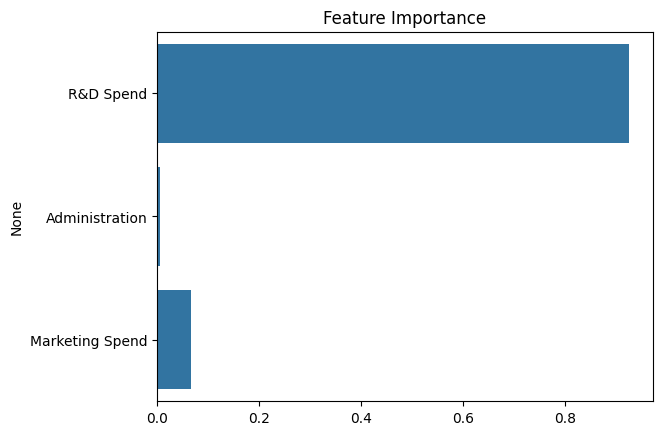

In [9]:
# Only works for tree-based models
importances = best_model.feature_importances_
features = X.columns

sns.barplot(x=importances, y=features)
plt.title("Feature Importance")
plt.show()
